In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 2. Algoritmo Multipaso
Juan Carlos Rojas V. 202214037, Thomas Andrade H. 202214695

In [30]:
def analytic_sol(x):
    return -x/2 - (1-np.exp(2*x))/4

In [24]:
def f(x,y):
    return x + 2*y

In [25]:
def Runge_Kutta4(f,y_0,t):
    """
    f es la función de dy/dt = f(y,t)
    y_0 es una initial guess
    t es el linspace de tiempo (o variable independiente, como querás)
    """
    
    h = t[1] - t[0]
    y = np.zeros_like(t)
    y[0] = y_0
    
    for i in range(1,len(t)):
        k1 = h*f(y[i-1],t[i-1])
        k2 = h*f(t[i-1]+h/2,y[i-1] +k1/2)
        k3 = h* f(t[i-1]+h/2, y[i-1] + k2/2)
        k4 = h* f(t[i-1]+h,y[i-1] +k3)
        y[i] = y[i-1] + (k1+2*k2+2*k3+k4)/6
    
    return y

In [26]:
def Adams_Bashforth_Moulton(f,x,y_sol_proposed):
    """
    Básicamente, lo que hace esta maricada es que coges la función de tu ecuación deferencial dy/dx = f(x,y) y, 
    luego de haberla resuelto con método de Runge-Kutta, se lo metes a esta función por medio de y_sol_proposed y
    esta madre te lo corrige para que quede Gucci.
    """
    
    h = x[1] - x[0]
    
    y = y_sol_proposed.copy() #Una copia de la solución (de cagada) que te dejó RK
    yc = y.copy() #Otra copia (la que vamos a modificar ;D)/corregir.
    
    for i in range(5,len(x)):
        #Esta partecita de aquí lo que hace es hacer una una predicción del siguiente valor
        #Teniendo en cuenta las soluciones anteriores, esto gracias a que se tiene la solución (de cagada) que te dejó el método de 
        # aproximación (RK4354354, por ejemplo). Esto es la parte Bashforth
        
        y[i] = y[i-1] + h*((1901/720)*f(x[i-1],y[i-1]) -(2774/720)*f(x[i-2],y[i-2]) + (2616/720)*f(x[i-3],y[i-3]) -(1274/720)*f(x[i-4],y[i-4]) + (251/720)*f(x[i-5],y[i-5]))
        yc[i] = y[i]
        
        """
        Lo que sigue es la parte Moulton, que se trata de la corrección de la predicción
        que hizo el algoritmo Bashforth para la solución (de mierda) que te entregó RK. Hay de varios órdenes (en este caso 2) en Wiki están los demás-
        """
        
        yc[i] = yc[i-1] + h*( (475/1440)*f(x[i],y[i]) + (1427/1440)*f(x[i-1],y[i-1]) -(798/1440)* f(x[i-2],y[i-2]) + (482/1440)*f(x[i-3],y[i-3]) - (172/1440)*f(x[i-4],y[i-4]) + (27/1440)*f(x[i-5],y[i-5]))
        
        return y,yc # Te devuelve la predicción y la corrección (respectivamente)
        

In [27]:
N = 100
t = np.linspace(0.,4.,N)
y_0 = 0

In [28]:
y_mala = Runge_Kutta4(f,y_0,t)
y_bashforth,y_moulton = Adams_Bashforth_Moulton(f,t,y_mala)

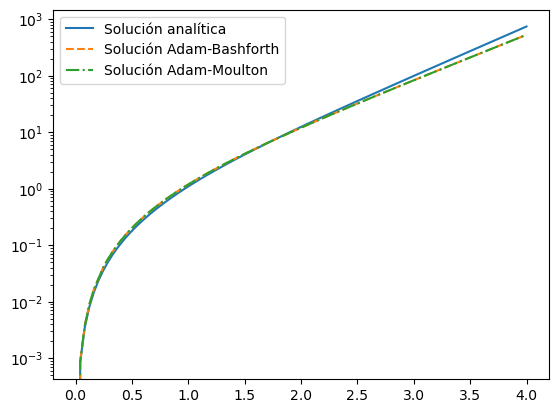

In [38]:
plt.plot(t,analytic_sol(t),label="Solución analítica",linestyle="solid")
plt.plot(t,y_bashforth,label="Solución Adam-Bashforth",linestyle="dashed")
plt.plot(t,y_moulton,label="Solución Adam-Moulton",linestyle="dashdot")
plt.yscale("log")
plt.legend()